In [1]:
# Exploring DIABIMMUNE data
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
from tqdm import tqdm

In [2]:
# Get rdata from internet: 
# result = pyreadr.read_r('data/diabimmune.rda')

diabimmune_metadata = pd.read_table("./diabimmune.tsv")
diabimmune_metadata.head()

,subjectID,country,sampleID,age_at_collection,cohort,gid_wgs,gid_16s
0,E000823,FIN,3000150,56,abx,NaN,G74397
1,E000823,FIN,3102720,259,abx,NaN,G69867
2,E000823,FIN,3114328,760,abx,NaN,G74423
3,E000823,FIN,3106240,511,abx,NaN,G74306
4,E000823,FIN,3000042,151,abx,NaN,G69730


In [3]:
diabimmune_both = diabimmune_metadata.dropna()
print(len(diabimmune_both) / len(diabimmune_metadata) * 100) # 30% of the data is available
print(len(diabimmune_both))

30.128396536279485
1009


In [4]:
# How many distinct subjects?
n_subjects = len(diabimmune_both['subjectID'].unique())
print(n_subjects)
print(len(diabimmune_both) / n_subjects) # 4 samples per subject, on average

257
3.9260700389105057


In [8]:
# At this point, I have downloaded all of the 16S reads. They are in the dir
# ~/DATA/diabimmune/reads

# I will now move these files to ~/DATA/diabimmune/16s_shared/reads

! mkdir -p ~/DATA/diabimmune/16s_shared/reads

for i in range(len(diabimmune_both)):
    ! mv ~/DATA/diabimmune/reads/{diabimmune_both.iloc[i]['gid_16s']}* ~/DATA/diabimmune/16s_shared/reads/

zsh:1: no matches found: /home/phil/DATA/diabimmune/reads/G74454*
zsh:1: no matches found: /home/phil/DATA/diabimmune/reads/G69809*
zsh:1: no matches found: /home/phil/DATA/diabimmune/reads/G68498*
zsh:1: no matches found: /home/phil/DATA/diabimmune/reads/G36025*
zsh:1: no matches found: /home/phil/DATA/diabimmune/reads/G36451*
zsh:1: no matches found: /home/phil/DATA/diabimmune/reads/G35881*
zsh:1: no matches found: /home/phil/DATA/diabimmune/reads/G35867*
zsh:1: no matches found: /home/phil/DATA/diabimmune/reads/G69741*
zsh:1: no matches found: /home/phil/DATA/diabimmune/reads/G68204*
zsh:1: no matches found: /home/phil/DATA/diabimmune/reads/G68224*
zsh:1: no matches found: /home/phil/DATA/diabimmune/reads/G75872*
zsh:1: no matches found: /home/phil/DATA/diabimmune/reads/G75855*
zsh:1: no matches found: /home/phil/DATA/diabimmune/reads/G73882*
zsh:1: no matches found: /home/phil/DATA/diabimmune/reads/G75694*
zsh:1: no matches found: /home/phil/DATA/diabimmune/reads/G75788*
zsh:1: no 

UnboundLocalError: local variable 'child' referenced before assignment

In [6]:
# We need to download the corresponding WGS reads

! mkdir -p ~/DATA/diabimmune/wgs_shared
! mkdir -p ~/DATA/diabimmune/wgs_shared/reads

for id in tqdm(diabimmune_both['gid_wgs']):
    if not os.path.exists(f"~/DATA/diabimmune/wgs_shared/reads/{id}_R1.fastq.gz"):
        ! wget https://diabimmune.broadinstitute.org/diabimmune/data/20/{id}_R1.fastq.gz
    if not os.path.exists(f"~/DATA/diabimmune/wgs_shared/reads/{id}_R2.fastq.gz"):
        ! wget https://diabimmune.broadinstitute.org/diabimmune/data/20/{id}_R2.fastq.gz
    if not os.path.exists(f"~/DATA/diabimmune/wgs_shared/reads/{id}_unpaired.fastq.gz"):
        ! wget https://diabimmune.broadinstitute.org/diabimmune/data/20/{id}_unpaired.fastq.gz
    ! mv {id}_*.fastq.gz ~/DATA/diabimmune/wgs_shared/reads/

  0%|          | 0/1009 [00:00<?, ?it/s]

--2023-02-12 16:33:50--  https://diabimmune.broadinstitute.org/diabimmune/data/20/G80124_R1.fastq.gz
Resolving diabimmune.broadinstitute.org (diabimmune.broadinstitute.org)... 69.173.93.60
Connecting to diabimmune.broadinstitute.org (diabimmune.broadinstitute.org)|69.173.93.60|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 711032697 (678M) [application/x-gzip]
Saving to: ‘G80124_R1.fastq.gz’

G80124_R1.fastq.gz  100%[===================>] 678.09M  19.2MB/s    in 35s     

2023-02-12 16:34:26 (19.2 MB/s) - ‘G80124_R1.fastq.gz’ saved [711032697/711032697]

--2023-02-12 16:34:26--  https://diabimmune.broadinstitute.org/diabimmune/data/20/G80124_R2.fastq.gz
Resolving diabimmune.broadinstitute.org (diabimmune.broadinstitute.org)... 69.173.93.60
Connecting to diabimmune.broadinstitute.org (diabimmune.broadinstitute.org)|69.173.93.60|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 689083198 (657M) [application/x-gzip]
Saving to: ‘G80124_R2.

  0%|          | 1/1009 [01:19<22:13:00, 79.35s/it]

--2023-02-12 16:35:10--  https://diabimmune.broadinstitute.org/diabimmune/data/20/G79049_R1.fastq.gz
Resolving diabimmune.broadinstitute.org (diabimmune.broadinstitute.org)... 69.173.93.60
Connecting to diabimmune.broadinstitute.org (diabimmune.broadinstitute.org)|69.173.93.60|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 139590801 (133M) [application/x-gzip]
Saving to: ‘G79049_R1.fastq.gz’

G79049_R1.fastq.gz  100%[===================>] 133.12M  19.2MB/s    in 7.0s    

2023-02-12 16:35:17 (19.1 MB/s) - ‘G79049_R1.fastq.gz’ saved [139590801/139590801]

--2023-02-12 16:35:17--  https://diabimmune.broadinstitute.org/diabimmune/data/20/G79049_R2.fastq.gz
Resolving diabimmune.broadinstitute.org (diabimmune.broadinstitute.org)... 69.173.93.60
Connecting to diabimmune.broadinstitute.org (diabimmune.broadinstitute.org)|69.173.93.60|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 132976352 (127M) [application/x-gzip]
Saving to: ‘G79049_R2.

  0%|          | 2/1009 [01:36<12:01:32, 42.99s/it]

--2023-02-12 16:35:27--  https://diabimmune.broadinstitute.org/diabimmune/data/20/G78999_R1.fastq.gz
Resolving diabimmune.broadinstitute.org (diabimmune.broadinstitute.org)... 69.173.93.60
Connecting to diabimmune.broadinstitute.org (diabimmune.broadinstitute.org)|69.173.93.60|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 585215567 (558M) [application/x-gzip]
Saving to: ‘G78999_R1.fastq.gz’

G78999_R1.fastq.gz    4%[                    ]  26.05M  18.6MB/s               ^C
--2023-02-12 16:35:29--  https://diabimmune.broadinstitute.org/diabimmune/data/20/G78999_R2.fastq.gz
Resolving diabimmune.broadinstitute.org (diabimmune.broadinstitute.org)... 69.173.93.60
Connecting to diabimmune.broadinstitute.org (diabimmune.broadinstitute.org)|69.173.93.60|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 563767264 (538M) [application/x-gzip]
Saving to: ‘G78999_R2.fastq.gz’

G78999_R2.fastq.gz  100%[===================>] 537.65M  19.1MB/s    in 2

  0%|          | 3/1009 [02:12<11:00:52, 39.42s/it]

--2023-02-12 16:36:02--  https://diabimmune.broadinstitute.org/diabimmune/data/20/G45069_R1.fastq.gz
Resolving diabimmune.broadinstitute.org (diabimmune.broadinstitute.org)... 69.173.93.60
Connecting to diabimmune.broadinstitute.org (diabimmune.broadinstitute.org)|69.173.93.60|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 595936467 (568M) [application/x-gzip]
Saving to: ‘G45069_R1.fastq.gz’

G45069_R1.fastq.gz   31%[=====>              ] 179.98M  18.0MB/s    eta 21s    ^C
--2023-02-12 16:36:13--  https://diabimmune.broadinstitute.org/diabimmune/data/20/G45069_R2.fastq.gz
Resolving diabimmune.broadinstitute.org (diabimmune.broadinstitute.org)... 69.173.93.60
Connecting to diabimmune.broadinstitute.org (diabimmune.broadinstitute.org)|69.173.93.60|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 584477159 (557M) [application/x-gzip]
Saving to: ‘G45069_R2.fastq.gz’

G45069_R2.fastq.gz   49%[========>           ] 275.51M  19.2MB/s    eta 

In [12]:
# Which samples did aPTR return a result for?

aptr_out = pd.read_table(
    "/home/phil/aptr/experiments/diabimmune/16s_shared/aptr_8223c61e-4f69-4350-afb5-3b096f484af1/inferred_ptrs.tsv",
    dtype={0: str},
)
aptr_out = aptr_out.set_index(aptr_out.columns[0])
aptr_estimates = aptr_out.loc[:,aptr_out.sum(axis=0) > 0].columns 
print(len(aptr_estimates))

78


In [22]:
# Move corresponding WGS reads to a special directory - 78 samples

# First, make a dictionary to convert sample IDs
wgs_to_rna = dict(zip(diabimmune_both['gid_wgs'], diabimmune_both['gid_16s']))
rna_to_wgs = dict(zip(diabimmune_both['gid_16s'], diabimmune_both['gid_wgs']))

! mkdir -p ~/DATA/diabimmune/wgs_aptr/reads

for rna_id in aptr_estimates:
    rna_id = rna_id.split("_")[0]
    wgs_id = rna_to_wgs[rna_id]
    ! cp ~/DATA/diabimmune/wgs_shared/reads/{wgs_id}_R1.fastq.gz ~/DATA/diabimmune/wgs_aptr/reads
    ! cp ~/DATA/diabimmune/wgs_shared/reads/{wgs_id}_R2.fastq.gz ~/DATA/diabimmune/wgs_aptr/reads

# Run coPTR on matched WGS reads
This must be run using the `coPTR` conda environment

In [1]:
# First, make an index for the relevant genomes
import pandas as pd

aptr_out = pd.read_table(
    "/home/phil/aptr/experiments/diabimmune/16s_shared/aptr_8223c61e-4f69-4350-afb5-3b096f484af1/inferred_ptrs.tsv",
    dtype={0: str},
)
aptr_genomes = aptr_out.iloc[:,0]

! mkdir -p ~/DATA/diabimmune/wgs_aptr/coptr_out/seqs
! mkdir -p ~/DATA/diabimmune/wgs_aptr/coptr_out/index

for genome_id in aptr_genomes:
    ! cp ~/aptr/data/seqs/{genome_id}.fna ~/DATA/diabimmune/wgs_aptr/coptr_out/seqs

# Create coPTR index
! coptr index ~/DATA/diabimmune/wgs_aptr/coptr_out/seqs ~/DATA/diabimmune/wgs_aptr/coptr_out/index/seqs

[INFO] [Feb 12, 2023 17:07:11] [coptr.read_mapper] Found 16 files totaling 0.0543 GB.
[INFO] [Feb 12, 2023 17:07:11] [coptr.read_mapper] Copying FASTA files to coptr-fna-2023-02-12T22:07:11+00:00.fna with prepended genome ids (filenames).
[INFO] [Feb 12, 2023 17:07:12] [coptr.read_mapper] Writing 16 reference genome ids to /home/phil/DATA/diabimmune/wgs_aptr/coptr_out/index/seqs.genomes.
[INFO] [Feb 12, 2023 17:07:12] [coptr.read_mapper] bowtie2-build coptr-fna-2023-02-12T22:07:11+00:00.fna /home/phil/DATA/diabimmune/wgs_aptr/coptr_out/index/seqs --threads 1
Settings:
  Output files: "/home/phil/DATA/diabimmune/wgs_aptr/coptr_out/index/seqs.*.bt2"
  Line rate: 6 (line is 64 bytes)
  Lines per side: 1 (side is 64 bytes)
  Offset rate: 4 (one in 16)
  FTable chars: 10
  Strings: unpacked
  Max bucket size: default
  Max bucket size, sqrt multiplier: default
  Max bucket size, len divisor: 4
  Difference-cover sample period: 1024
  Endianness: little
  Actual local endianness: little
  Sa

In [2]:
# Run coPTR
import os

outdir = "/home/phil/DATA/diabimmune/wgs_aptr/coptr_out"
readdir = "/home/phil/DATA/diabimmune/wgs_aptr/reads"

# # Make dirs
# ! mkdir -p {outdir}/bam
# ! mkdir -p {outdir}/coverage_maps

# # coPTR assumes reads end in _1 and _2, not _R1 and _R2 (idempotent batch rename):
# for file in os.listdir(readdir):
#     if file.endswith("_R1.fastq.gz"):
#         ! mv {readdir}/{file} {readdir}/{file.replace("_R1", "_1")}
#     if file.endswith("_R2.fastq.gz"):
#         ! mv {readdir}/{file} {readdir}/{file.replace("_R2", "_2")}

# # coPTR commands
# ! coptr map {outdir}/index/seqs {readdir} {outdir}/bam --threads 12 --paired
! coptr extract {outdir}/bam {outdir}/coverage_maps 
! coptr estimate {outdir}/coverage_maps {outdir}/coptr_log2_ptrs.csv
! coptr count {outdir}/coverage_maps {outdir}/coptr_counts.csv

zsh:1: command not found: coptr
zsh:1: command not found: coptr
zsh:1: command not found: coptr


In [11]:
# Compare coPTR and aPTR outputs
import pandas as pd

# Read outputs
coptr_out = pd.read_csv(
    "/home/phil/DATA/diabimmune/wgs_aptr/coptr_out/coptr_log2_ptrs.csv",
    dtype={0: str},
)
coptr_out = coptr_out.set_index(coptr_out.columns[0])
coptr_out = 2**coptr_out

aptr_out = pd.read_table(
    # "/home/phil/aptr/experiments/diabimmune/16s_shared/aptr_8223c61e-4f69-4350-afb5-3b096f484af1/inferred_ptrs.tsv",
    "../../experiments/diabimmune/16s_shared/aptr_c20891fa-743b-46f7-a6a4-61ce28849342/inferred_ptrs.tsv",
    dtype={0: str},
)
aptr_out = aptr_out.set_index(aptr_out.columns[0])

# Need to translate sample IDs
wgs_to_rna = dict(zip(diabimmune_both['gid_wgs'], diabimmune_both['gid_16s']))
coptr_out.columns = [wgs_to_rna[col] for col in coptr_out.columns]
aptr_out.columns = [name.split("_")[0] for name in aptr_out.columns]

# Overlaps between values
aptr_out = aptr_out.loc[:,aptr_out.sum(axis=0) > 0]
coptr_out = coptr_out.loc[:,coptr_out.sum(axis=0) > 0]

mask1 = aptr_out > 0
mask2 = coptr_out > 0
mask = mask1 & mask2

# 73 whole overlaps! Amazing
print(mask.sum().sum())

62.0


In [5]:
# Turn into vectors of values and get correlation coefficients

aptr_matched = aptr_out[mask].values.flatten()
aptr_matched = aptr_matched[~np.isnan(aptr_matched)]

coptr_matched = coptr_out[mask].values.flatten()
coptr_matched = coptr_matched[~np.isnan(coptr_matched)]

In [6]:
# Pearson's R

from scipy.stats import pearsonr, spearmanr

pr, _ = pearsonr(aptr_matched, coptr_matched)
sr, _ = spearmanr(aptr_matched, coptr_matched)

Text(0.5, 1.0, "Amplicon PTR vs coPTR estimates on DIABIMMUNE dataset\n(Pearson's R=0.08, Spearman's R=0.01)")

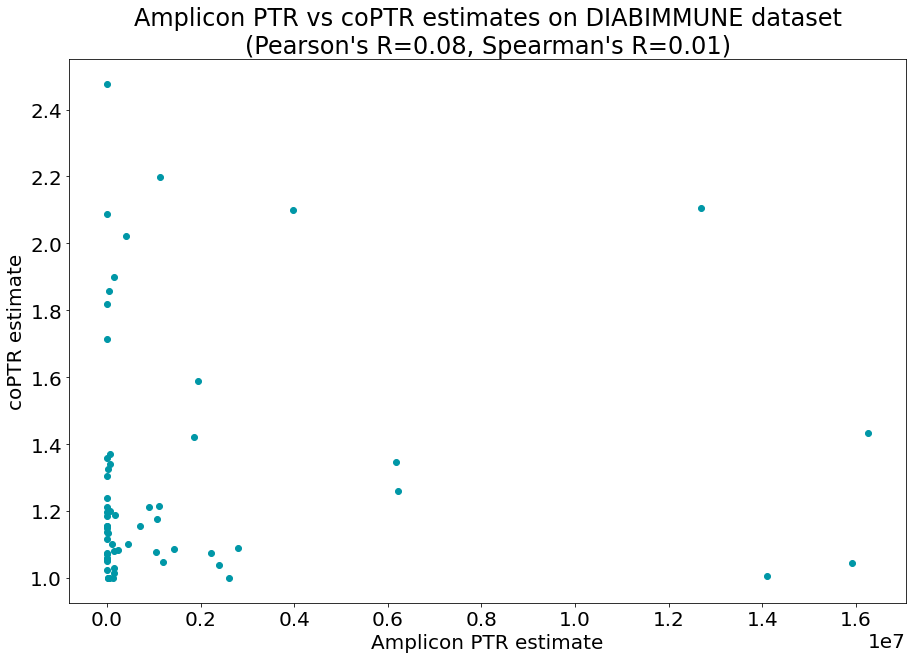

In [25]:
plt.rc("font", size=20)

fig = plt.figure(figsize=(15,10))
plt.scatter(aptr_matched, coptr_matched, c='#0097A7')
plt.xlabel("Amplicon PTR estimate")
plt.ylabel("coPTR estimate")
plt.title(f"Amplicon PTR vs coPTR estimates on DIABIMMUNE dataset\n(Pearson's R={pr:.2f}, Spearman's R={sr:.2f})")

In [17]:
mask3 = aptr_out <= 2
mask4 = mask3 & mask2

aptr_matched2 = aptr_out[mask4].values.flatten()
aptr_matched2 = aptr_matched2[~np.isnan(aptr_matched2)]

coptr_matched2 = coptr_out[mask4].values.flatten()
coptr_matched2 = coptr_matched2[~np.isnan(coptr_matched2)]

pr2, _ = pearsonr(aptr_matched2, coptr_matched2)
sr2, _ = spearmanr(aptr_matched2, coptr_matched2)
print(pr2, sr2)

-0.01857761903838884 -0.2043956043956044


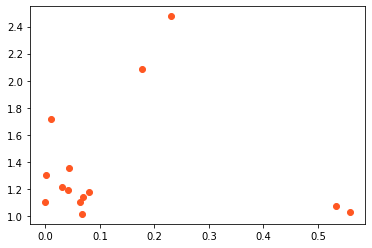

In [19]:
plt.scatter(aptr_matched2, coptr_matched2, c='#FF5722')